### Digits classification

In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.callbacks import TensorBoard

%load_ext tensorboard

from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, Flatten, MaxPooling2D

import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array


from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sn

<ipython-input-1-92bd49c82e91>:13: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [2]:
directory = 'Img'
files=os.listdir(directory)

images = []
for file in files:
    image=load_img(os.path.join(directory,file), grayscale=False, color_mode='rgb', target_size=(64,64))
    image = img_to_array(image)/255
    images.append(image)
X = np.array(images)
engl=pd.read_csv('english.csv')
y_char = np.array(engl['label'])
y = pd.factorize(y_char)[0]

In [3]:
X_train_pic, X_test_pic, y_train_pic, y_test_pic = train_test_split(X, y, test_size=0.1, stratify=y)

In [4]:
X_train_pic[0].shape

(64, 64, 3)

59


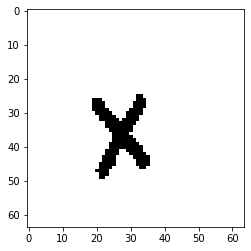

In [5]:
ind = 1
print(y_test_pic[ind])
plt.imshow(X_test_pic[ind], cmap='binary')

In [6]:
X_train_pic = X_train_pic.reshape(X_train_pic.shape[0], 64 , 64 , 3)
X_test_pic = X_test_pic.reshape(X_test_pic.shape[0], 64 , 64 , 3)
y_train_pic = tf.keras.utils.to_categorical(y_train_pic, 62)
y_test_pic = tf.keras.utils.to_categorical(y_test_pic, 62)

In [7]:
X_train_pic.shape, X_test_pic.shape, y_train_pic.shape, y_test_pic.shape

((3069, 64, 64, 3), (341, 64, 64, 3), (3069, 62), (341, 62))

In [9]:
# Базова згорткова модель з одним згортковим шаром

simple_model = Sequential()
simple_model.add(Conv2D(32, (5,5), activation='relu', input_shape=(64, 64, 3)))
simple_model.add(MaxPooling2D(2, 2))
simple_model.add(Flatten())
simple_model.add(Dense(units=512, activation='relu'))
simple_model.add(Dense(units=256, activation='relu'))
simple_model.add(Dense(units=62, activation='softmax'))

simple_model.compile(
    optimizer="rmsprop", 
    loss='categorical_crossentropy', 
    metrics=["accuracy"]
)

history = simple_model.fit(X_train_pic, y_train_pic, epochs=10, validation_split=0.2, callbacks=[TensorBoard(log_dir=f"logs/kaggle/simple")], verbose=1)

# За отриманих результатів бачимо явне перенавчання

Epoch 1/10
77/77 [==============================] - 11s 134ms/step - loss: 4.6468 - accuracy: 0.0896 - val_loss: 3.0682 - val_accuracy: 0.2020
Epoch 2/10
77/77 [==============================] - 10s 124ms/step - loss: 2.2429 - accuracy: 0.3992 - val_loss: 2.2301 - val_accuracy: 0.3730
Epoch 3/10
77/77 [==============================] - 9s 117ms/step - loss: 1.2616 - accuracy: 0.6464 - val_loss: 1.9262 - val_accuracy: 0.4886
Epoch 4/10
77/77 [==============================] - 9s 122ms/step - loss: 0.6817 - accuracy: 0.8045 - val_loss: 1.9815 - val_accuracy: 0.4772
Epoch 5/10
77/77 [==============================] - 10s 125ms/step - loss: 0.3698 - accuracy: 0.8974 - val_loss: 2.2220 - val_accuracy: 0.4739
Epoch 6/10
77/77 [==============================] - 9s 122ms/step - loss: 0.1919 - accuracy: 0.9389 - val_loss: 2.4945 - val_accuracy: 0.4984
Epoch 7/10
77/77 [==============================] - 9s 117ms/step - loss: 0.1241 - accuracy: 0.9678 - val_loss: 2.4895 - val_accuracy: 0.4967
Epo

In [10]:
# Розширені моделі із Dropout та BatchNormalization

batch_dropout_model = Sequential([
    BatchNormalization(input_shape=(64, 64, 3)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),

    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.5),
    
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),

    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),

    Flatten(),
    Dense(160, activation='relu'), 
    Dropout(0.5),
    Dense(62, activation='softmax')
])

batch_dropout_model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=["accuracy"]
)

history = batch_dropout_model.fit(X_train_pic, y_train_pic, epochs=60, validation_split=0.2, callbacks=[TensorBoard(log_dir=f"logs/kaggle/4Conv_layer")], verbose=1)

Epoch 1/60
77/77 [==============================] - 9s 109ms/step - loss: 4.1762 - accuracy: 0.0175 - val_loss: 4.1288 - val_accuracy: 0.0147
Epoch 2/60
77/77 [==============================] - 8s 104ms/step - loss: 4.0092 - accuracy: 0.0420 - val_loss: 4.0938 - val_accuracy: 0.0505
Epoch 3/60
77/77 [==============================] - 8s 98ms/step - loss: 3.7539 - accuracy: 0.0745 - val_loss: 4.0097 - val_accuracy: 0.1042
Epoch 4/60
77/77 [==============================] - 8s 99ms/step - loss: 3.4125 - accuracy: 0.1259 - val_loss: 3.5878 - val_accuracy: 0.2427
Epoch 5/60
77/77 [==============================] - 8s 98ms/step - loss: 3.0713 - accuracy: 0.1711 - val_loss: 2.9501 - val_accuracy: 0.3632
Epoch 6/60
77/77 [==============================] - 8s 98ms/step - loss: 2.7277 - accuracy: 0.2432 - val_loss: 2.5841 - val_accuracy: 0.4300
Epoch 7/60
77/77 [==============================] - 8s 99ms/step - loss: 2.4651 - accuracy: 0.2965 - val_loss: 2.0573 - val_accuracy: 0.5049
Epoch 8/60


In [11]:
# Дослідити вплив параметра padding

for padding in ['same', 'valid']:
    model = Sequential([
    BatchNormalization(input_shape=(64, 64, 3)),
    Conv2D(32, (3,3), padding=padding, activation='relu'),
    MaxPooling2D((2, 2), strides=2),

    BatchNormalization(),
    Conv2D(64, (3,3), padding=padding, activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.5),
    
    Conv2D(128, (3,3), padding=padding, activation='relu'),
    MaxPooling2D((2, 2), strides=2),

    Conv2D(128, (3,3), padding=padding, activation='relu'),
    MaxPooling2D((2, 2), strides=2),

    Flatten(),
    Dense(160, activation='relu'), 
    Dropout(0.5),
    Dense(62, activation='softmax')
    ])

    model.compile(
        optimizer="adam", 
        loss='categorical_crossentropy', 
        metrics=["accuracy"]
    )

    history = model.fit(X_train_pic, y_train_pic, epochs=50, validation_split=0.2, callbacks=[TensorBoard(log_dir=f"logs/kaggle/4Conv_layer_with_padding_{padding}")], verbose=0)
    print(f"{padding} : {model.evaluate(X_test_pic, y_test_pic)}")

# У цілому різниця незначна, хоча зі значенням valid отримали трохи вищий показник точності

11/11 [==============================] - 0s 21ms/step - loss: 0.6595 - accuracy: 0.8006
same : [0.6595127582550049, 0.8005865216255188]
11/11 [==============================] - 0s 17ms/step - loss: 0.8647 - accuracy: 0.8123
valid : [0.8646625280380249, 0.8123167157173157]


In [14]:
# Дослідити вплив параметра stride

for stride in [2, 3]:
    model = Sequential([
    BatchNormalization(input_shape=(64, 64, 3)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=stride),

    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=stride),
    Dropout(0.5),
    
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=stride),

    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=stride),

    Flatten(),
    Dense(160, activation='relu'), 
    Dropout(0.5),
    Dense(62, activation='softmax')
    ])

    model.compile(
        optimizer="adam", 
        loss='categorical_crossentropy', 
        metrics=["accuracy"]
    )

    history = model.fit(X_train_pic, y_train_pic, epochs=50, validation_split=0.2, callbacks=[TensorBoard(log_dir=f"logs/kaggle/4Conv_layer_with_stride_{stride}")], verbose=0)
    print(f"Stride {stride} : test - {model.evaluate(X_test_pic, y_test_pic)}")

# Для параметра stride = 2 бачимо вищий показник точності

11/11 [==============================] - 0s 23ms/step - loss: 0.7774 - accuracy: 0.8006
Stride 2 : test - [0.7774229645729065, 0.8005865216255188]
11/11 [==============================] - 0s 13ms/step - loss: 0.9604 - accuracy: 0.7331
Stride 3 : test - [0.9604408144950867, 0.733137845993042]


In [15]:
# Дослідити вплив розмірності ядра згортки

for kernel_size in [2, 3, 4]:
    model = Sequential([
    BatchNormalization(input_shape=(64, 64, 3)),
    Conv2D(32, (kernel_size,kernel_size), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),

    BatchNormalization(),
    Conv2D(64, (kernel_size,kernel_size), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.5),
    
    Conv2D(128, (kernel_size,kernel_size), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),

    Conv2D(128, (kernel_size,kernel_size), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),

    Flatten(),
    Dense(160, activation='relu'), 
    Dropout(0.5),
    Dense(62, activation='softmax')
    ])

    model.compile(
        optimizer="adam", 
        loss='categorical_crossentropy', 
        metrics=["accuracy"]
    )

    history = model.fit(X_train_pic, y_train_pic, epochs=50, validation_split=0.2, callbacks=[TensorBoard(log_dir=f"logs/kaggle/4Conv_layer_with_kernersize_{kernel_size}")], verbose=0)
    print(f"Kernel size {kernel_size} : {model.evaluate(X_test_pic, y_test_pic)}")

# Результати точності відрізняються, найкраще показала себе згортка з розміром ядра 4

11/11 [==============================] - 0s 16ms/step - loss: 0.8285 - accuracy: 0.7625
Kernel size 2 : [0.8284952640533447, 0.7624633312225342]
11/11 [==============================] - 0s 22ms/step - loss: 0.8799 - accuracy: 0.7771
Kernel size 3 : [0.8799195885658264, 0.7771260738372803]
11/11 [==============================] - 0s 28ms/step - loss: 1.0851 - accuracy: 0.7947
Kernel size 4 : [1.0851237773895264, 0.7947214245796204]


In [16]:
# Завантажити зображення тестової множни i розпiзнати його навченими моделями.

predicted = batch_dropout_model.predict(X_test_pic)

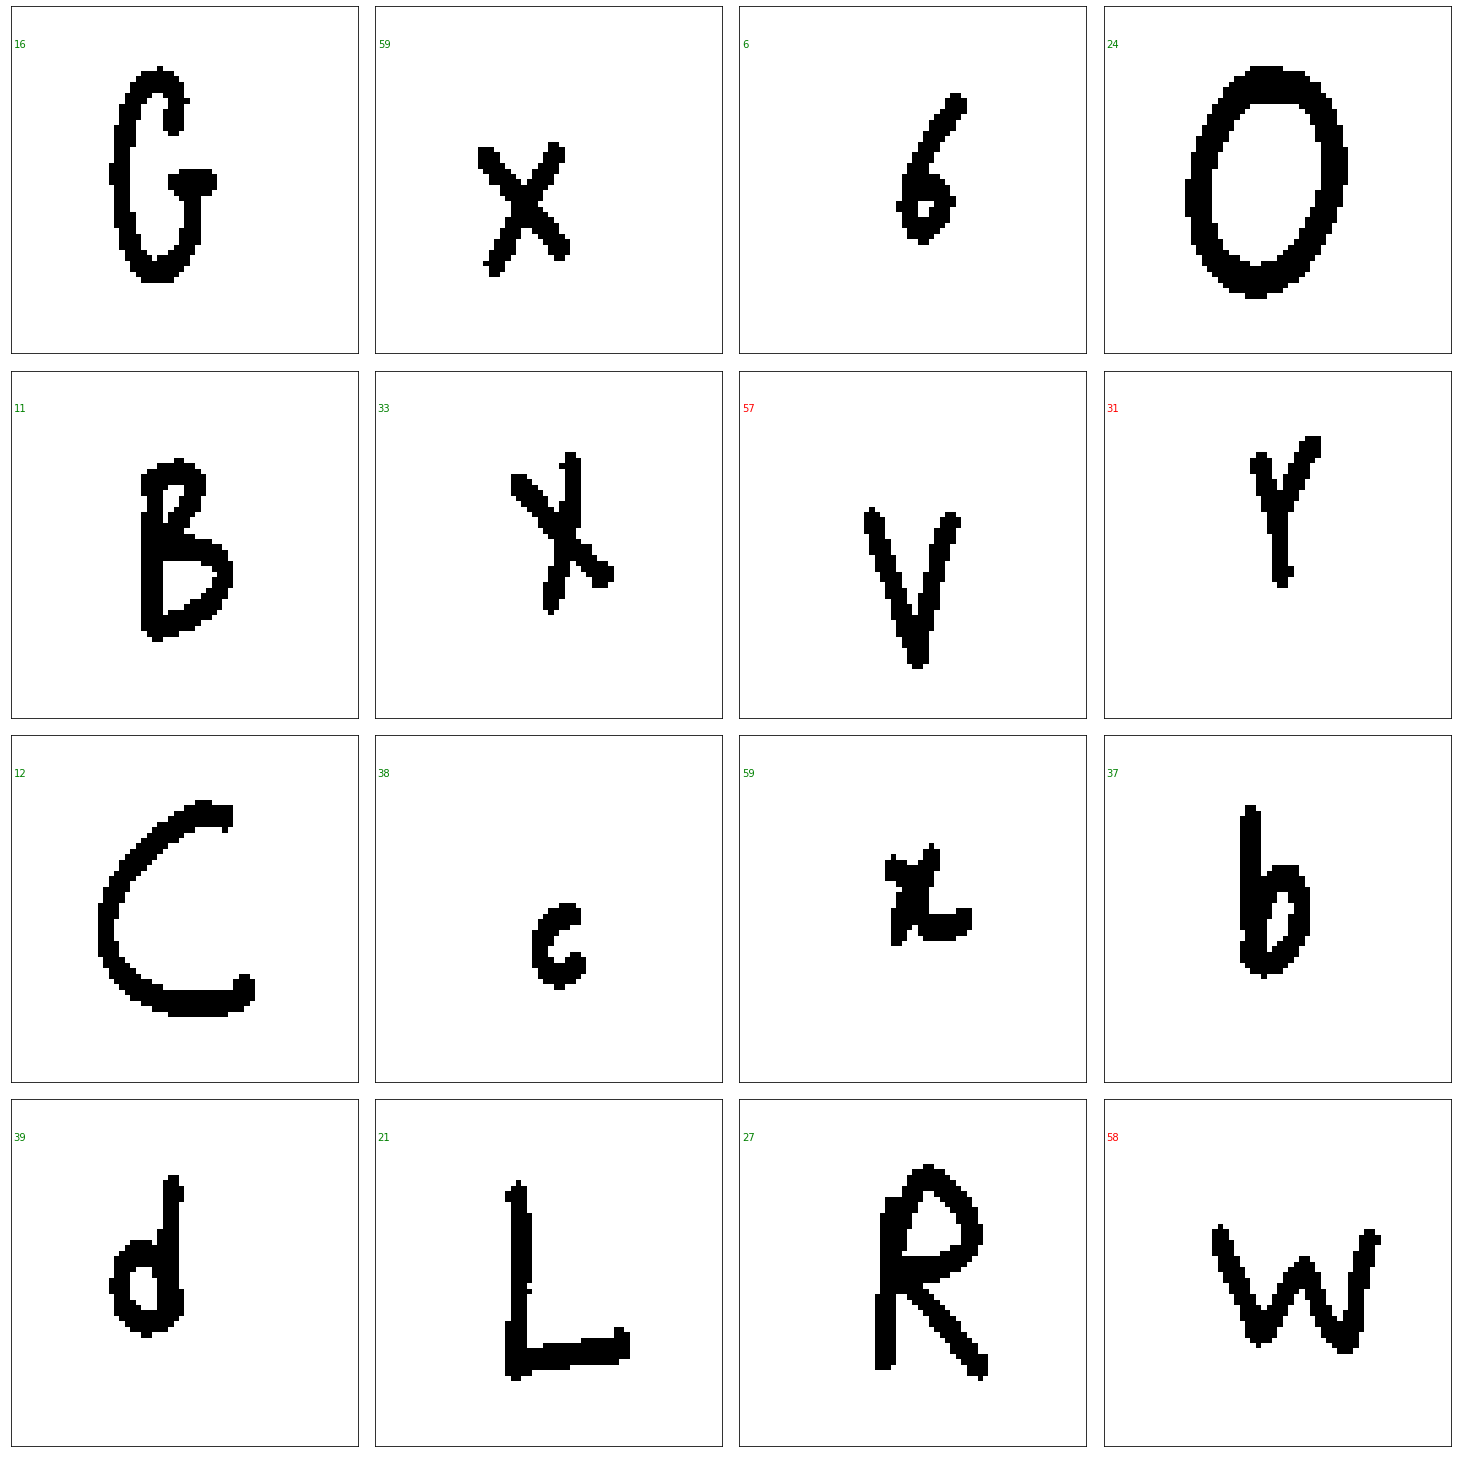

In [35]:
fig = plt.figure(figsize=(20, 20))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 64x64 pixels
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test_pic[i], cmap='binary')
    pred = np.argmax(predicted[i])
    exp = np.argmax(y_test_pic[i])

    # label the image with the target value
    if pred == exp:
        ax.text(0, 7, str(pred), color='green')
    else:
        ax.text(0, 7, str(pred), color='red')

In [49]:
exp = list(map(lambda x: np.argmax(x), y_test_pic))
pred = list(map(lambda x: np.argmax(x), predicted))

In [50]:
print(metrics.classification_report(exp, pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.33      0.40      0.36         5
           2       0.86      1.00      0.92         6
           3       0.62      1.00      0.77         5
           4       1.00      0.83      0.91         6
           5       0.86      1.00      0.92         6
           6       0.71      1.00      0.83         5
           7       0.80      0.80      0.80         5
           8       0.71      0.83      0.77         6
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         6
          11       0.86      1.00      0.92         6
          12       0.86      1.00      0.92         6
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         6
          16       1.00      0.50      0.67         6
          17       1.00    

<AxesSubplot:>

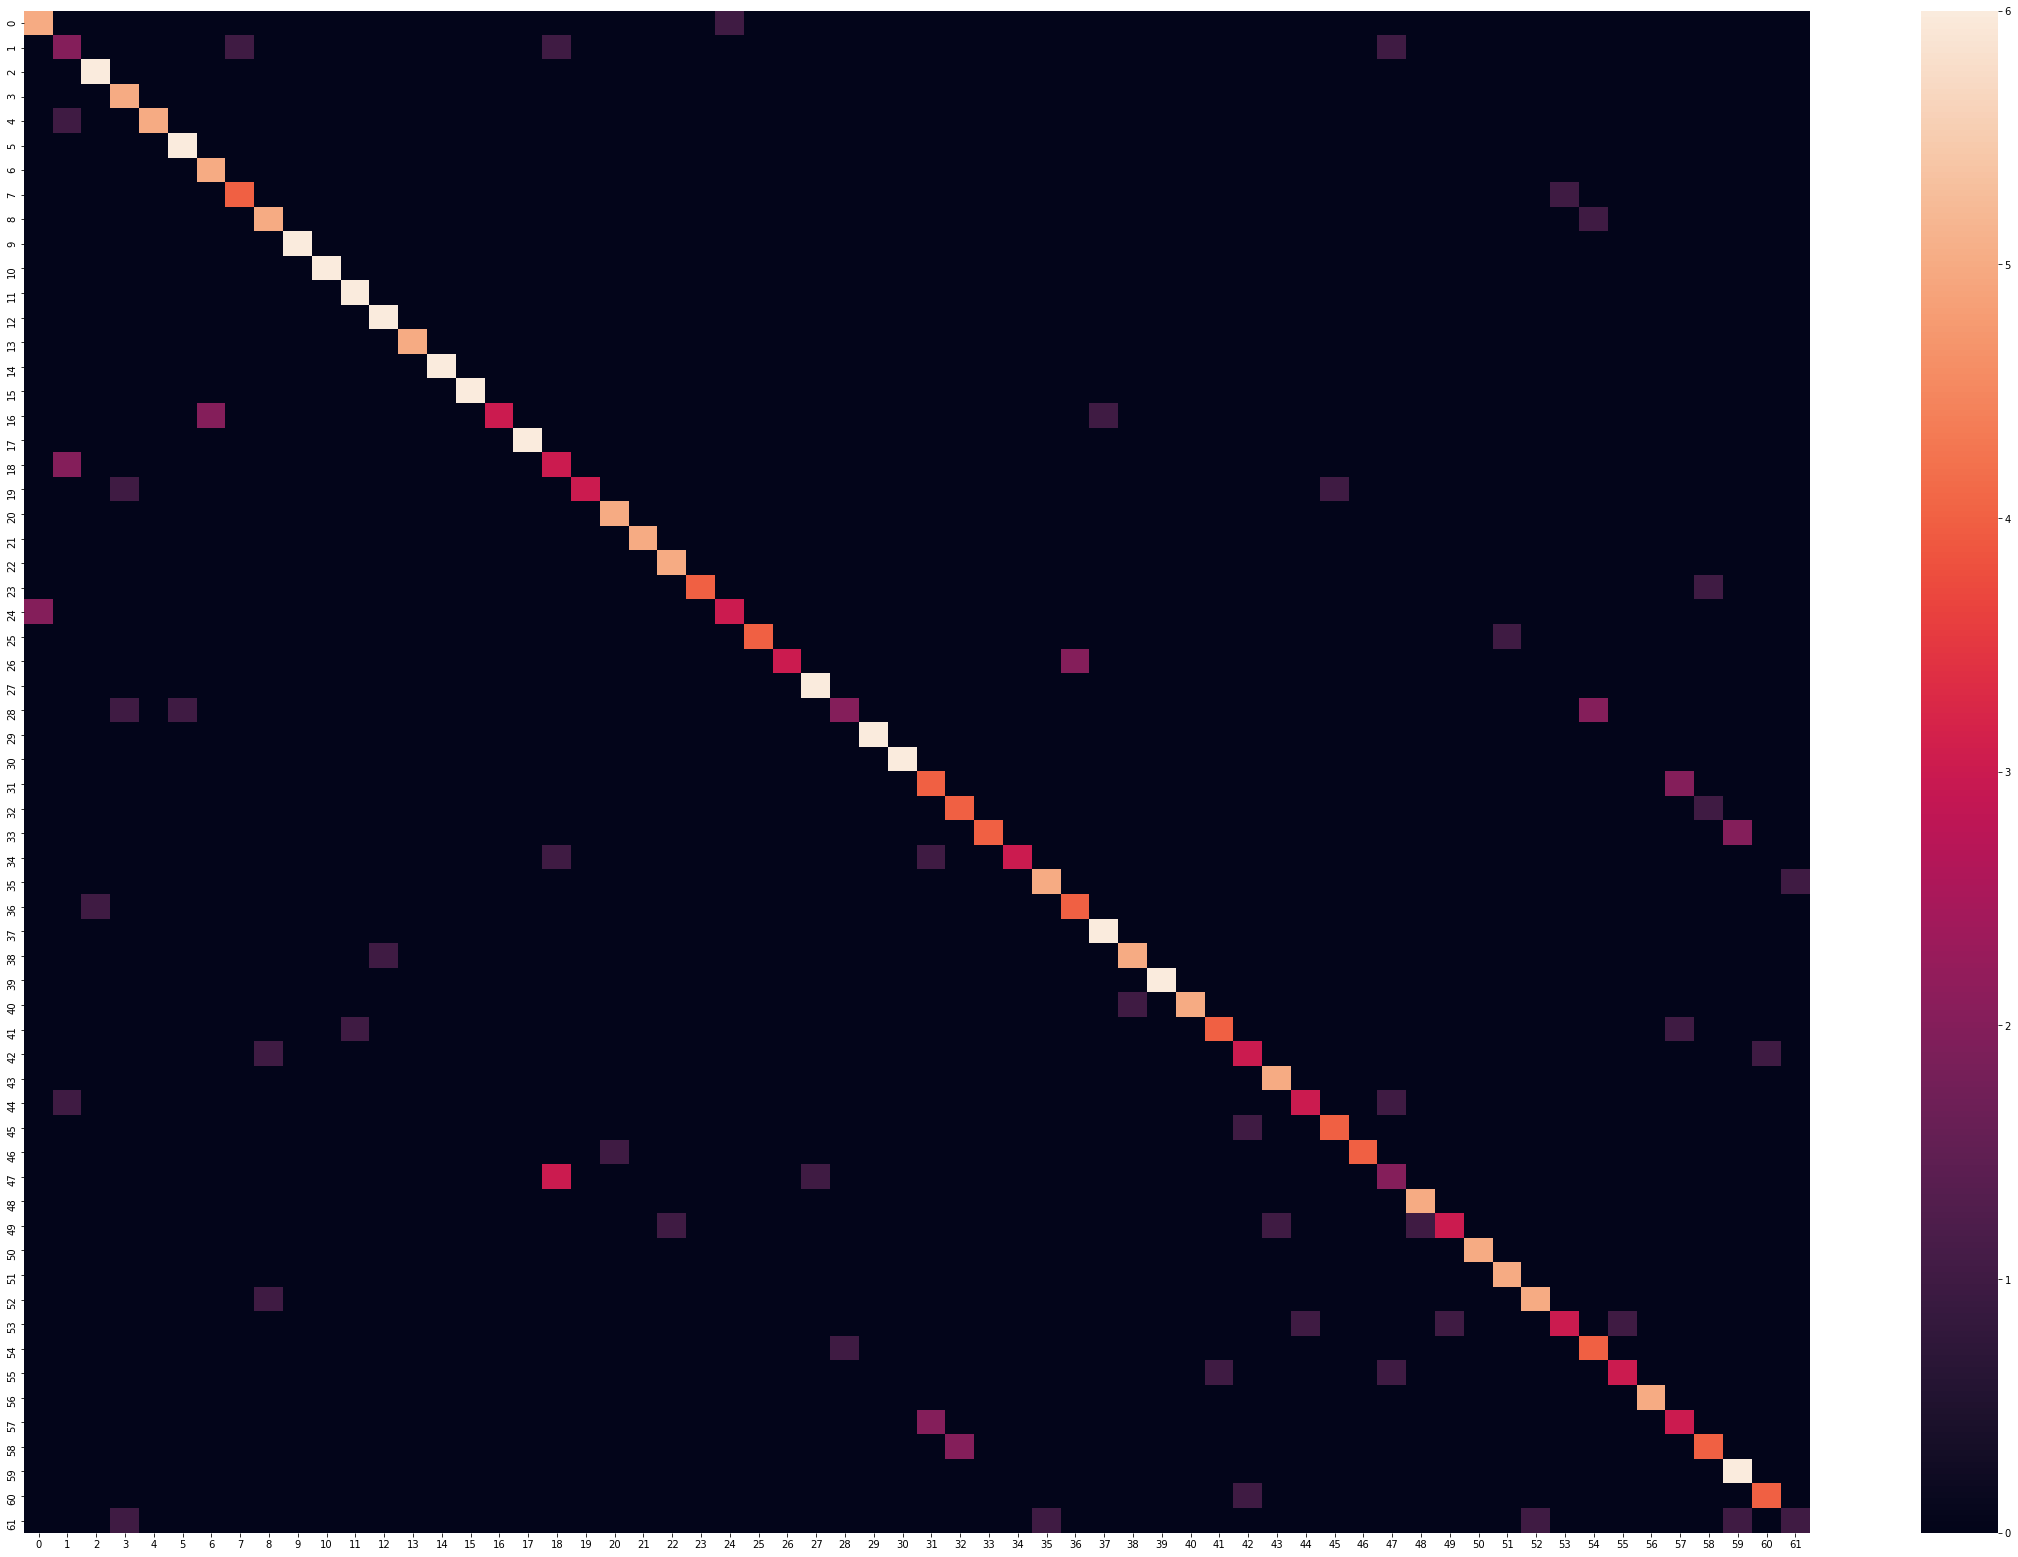

In [59]:
matrix = metrics.confusion_matrix(exp, pred)
plt.figure(figsize = (40,28))
sn.heatmap(matrix)